<a href="https://colab.research.google.com/github/mehedizamane/Sample-codes/blob/main/POPANE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%%                           Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn

In [ ]:
#%% Initialization
y_predict = [] # for multilayer
algorithms = ["Logistic Regression","K-nn", "SVM", "Naive Bayes", "Decission Tree", "Random Forest","XgBoost", "AdaBoost"]
accuracy  = []
precision = []
recall    = []
f1_value  = []

In [ ]:
#%%    User define function 
# print function 
def print_summary(ac,pr,re,f):
    print("Accuracy    =", ac)
    print("Precision   =", pr)
    print("Recall      =", re)
    print("F1 Score    =", f)
    print("\n")

In [ ]:
# plot function
def plott(x,y,z):

    #f = plt.figure()
    sn.set(font_scale=1)
    plt.rcParams['figure.figsize']=20,10
    sn.set_style("darkgrid")
    ax = sn.barplot(x, y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel(z, fontsize = 20)
    plt.title(z, fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [ ]:
# model score function 
def model_score (y_test,y_pred):
    # Statistical Score
    st = 'macro'  # 'micro',  'macro' , 'weighted' None
    ac  = accuracy_score(y_test, y_pred)  # for multi class
    pre = precision_score(y_test, y_pred, average = st) # use [accuracy_score(y_test, y_pred, average = st)]
    re  = recall_score(y_test, y_pred, average = st)
    f1  = f1_score(y_test, y_pred, average = st) 
    results = [ac,pre,re, f1]
    return results

In [ ]:
# k fold
def k_fold(classifer):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn import metrics
    
    n = 10 
    
    accuracy  = cross_val_score(classifer, X,y, cv =n)
    precision = cross_val_score(classifer, X, y, cv=n, scoring='precision_macro')
    recall = cross_val_score(classifer, X, y, cv=n, scoring='recall_macro')
    f1 = cross_val_score(classifer, X, y, cv=n, scoring='f1_macro')
    accuracy = accuracy.mean()
    precision = precision.mean()
    recall = recall.mean()
    f1 = f1.mean()

    # Plot 
    import seaborn as sns
    yplot = [accuracy, precision, recall, f1]
    xplot = ['accuracy', 'precision' ,'recall', 'f1 score']
    sns.barplot(x = xplot, y= yplot)
    plt.show()
    
    # Print section
    print('Accuracy   :', accuracy)
    print('Precision  :',precision)
    print('Recall     :',recall)
    print('f1 score   :',f1)
    print('\n')
    
    results = [accuracy, precision, recall, f1]
    return results

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/POPANE/POPANE Dataset_v2.xlsx')
print(dataset.head())
dataset.isnull().sum()

   Maximum  Minimum  Variance  Kurtosis  Skewness  Standard deviation     EDA  \
0    10.02     7.57  0.178500    5.8203    1.7728            0.422500  8.1757   
1    11.64     6.71  0.874600    4.6198    1.2011            0.935200  8.3250   
2    10.86     6.77  1.012600    3.3128    1.1812            1.006300  8.0875   
3     3.99     3.59  0.005902    4.9604    1.4539            0.076825  3.6810   
4     4.39     3.79  0.007763    6.2914    1.3119            0.088109  3.9973   

      SBP     DBP      CO      TPR  CLASS  
0  112.36  71.810  6.8677  0.72183    0.0  
1  113.00  72.157  7.0499  0.70407    0.0  
2  116.65  72.578  7.9440  0.62912    0.0  
3  111.86  69.234  6.0638  0.78234    0.0  
4  114.07  71.507  6.2010  0.80362    0.0  


Maximum                 0
Minimum                 0
Variance                0
Kurtosis               31
Skewness               31
Standard deviation      0
EDA                     0
SBP                     0
DBP                     0
CO                    284
TPR                   294
CLASS                   0
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Maximum,Minimum,Variance,Kurtosis,Skewness,Standard deviation,EDA,SBP,DBP,CO,TPR,CLASS
80,1.52,1.22,0.004411,4.6937,1.449700,0.066415,1.30770,134.890,103.600,2.6616,NaN,0.0
90,2.64,1.75,0.029420,9.5176,2.503300,0.171520,1.91530,173.280,117.210,2.2541,NaN,0.0
92,3.29,1.79,0.085033,9.9030,2.555800,0.291600,2.02430,178.610,122.830,2.1337,NaN,0.0
216,0.00,0.00,0.000000,NaN,NaN,0.000000,0.00000,126.990,80.861,4.9846,1.0742,0.0
217,0.00,0.00,0.000000,NaN,NaN,0.000000,0.00000,128.270,81.655,5.0030,1.0795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,-0.24,-0.82,0.022759,2.5756,-0.004384,0.150860,-0.56176,83.539,95.215,NaN,NaN,10.0
2645,1.33,0.57,0.041217,2.6487,-0.132860,0.203020,0.97267,103.060,109.430,NaN,NaN,10.0
2646,0.51,0.47,0.000150,1.7199,0.538090,0.012237,0.49008,76.800,91.098,NaN,NaN,10.0
2647,1.94,1.21,0.042873,2.4165,-0.852750,0.207060,1.63690,71.337,80.999,NaN,NaN,10.0


In [ ]:
# Drop rows containing NaN values
dataset=dataset.dropna()
#Confirm there are now no nulls
dataset.isnull().sum()

Maximum               0
Minimum               0
Variance              0
Kurtosis              0
Skewness              0
Standard deviation    0
EDA                   0
SBP                   0
DBP                   0
CO                    0
TPR                   0
CLASS                 0
dtype: int64

In [ ]:
dataset.dtypes

Maximum               float64
Minimum               float64
Variance              float64
Kurtosis              float64
Skewness              float64
Standard deviation    float64
EDA                   float64
SBP                   float64
DBP                   float64
CO                    float64
TPR                   float64
CLASS                 float64
dtype: object

In [ ]:
dataset

,Maximum,Minimum,Variance,Kurtosis,Skewness,Standard deviation,EDA,SBP,DBP,CO,TPR,CLASS
0,10.020,7.570,1.785000e-01,5.8203,1.772800,0.422500,8.175700,112.36,71.810,6.8677,0.72183,0.0
1,11.640,6.710,8.746000e-01,4.6198,1.201100,0.935200,8.325000,113.00,72.157,7.0499,0.70407,0.0
2,10.860,6.770,1.012600e+00,3.3128,1.181200,1.006300,8.087500,116.65,72.578,7.9440,0.62912,0.0
3,3.990,3.590,5.902000e-03,4.9604,1.453900,0.076825,3.681000,111.86,69.234,6.0638,0.78234,0.0
4,4.390,3.790,7.763200e-03,6.2914,1.311900,0.088109,3.997300,114.07,71.507,6.2010,0.80362,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2738,0.135,0.072,9.050000e-05,7.9046,-1.449700,0.009513,0.112070,128.46,97.760,7.1262,0.88580,10.0
2739,0.063,0.037,2.300000e-05,5.6171,-1.410600,0.004798,0.054599,137.69,81.628,9.7676,0.57426,10.0
2740,0.248,-0.010,1.207900e-03,5.6711,-0.050357,0.034754,0.127280,130.19,92.284,8.4719,0.62482,10.0
2741,0.104,0.032,2.031100e-04,5.2242,-1.285400,0.014252,0.079203,126.27,70.653,3.9879,1.15220,10.0


In [ ]:
dataset['CLASS'] = dataset['CLASS'].astype(int)

In [ ]:
dataset.dtypes

Maximum               float64
Minimum               float64
Variance              float64
Kurtosis              float64
Skewness              float64
Standard deviation    float64
EDA                   float64
SBP                   float64
DBP                   float64
CO                    float64
TPR                   float64
CLASS                   int64
dtype: object

In [ ]:
dataset

,Maximum,Minimum,Variance,Kurtosis,Skewness,Standard deviation,EDA,SBP,DBP,CO,TPR,CLASS
0,10.020,7.570,1.785000e-01,5.8203,1.772800,0.422500,8.175700,112.36,71.810,6.8677,0.72183,0
1,11.640,6.710,8.746000e-01,4.6198,1.201100,0.935200,8.325000,113.00,72.157,7.0499,0.70407,0
2,10.860,6.770,1.012600e+00,3.3128,1.181200,1.006300,8.087500,116.65,72.578,7.9440,0.62912,0
3,3.990,3.590,5.902000e-03,4.9604,1.453900,0.076825,3.681000,111.86,69.234,6.0638,0.78234,0
4,4.390,3.790,7.763200e-03,6.2914,1.311900,0.088109,3.997300,114.07,71.507,6.2010,0.80362,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2738,0.135,0.072,9.050000e-05,7.9046,-1.449700,0.009513,0.112070,128.46,97.760,7.1262,0.88580,10
2739,0.063,0.037,2.300000e-05,5.6171,-1.410600,0.004798,0.054599,137.69,81.628,9.7676,0.57426,10
2740,0.248,-0.010,1.207900e-03,5.6711,-0.050357,0.034754,0.127280,130.19,92.284,8.4719,0.62482,10
2741,0.104,0.032,2.031100e-04,5.2242,-1.285400,0.014252,0.079203,126.27,70.653,3.9879,1.15220,10


In [ ]:
dataset = shuffle(dataset)

In [ ]:
dataset.head()

,Maximum,Minimum,Variance,Kurtosis,Skewness,Standard deviation,EDA,SBP,DBP,CO,TPR,CLASS
817,6.48,5.64,0.061124,2.5641,0.86731,0.247230,5.9104,0.00,0.000,0.0000,0.00000,1
1069,5.15,2.90,0.243640,5.1807,1.72390,0.493600,3.3650,0.00,0.000,0.0000,0.00000,3
1580,4.65,4.33,0.009792,1.7583,-0.29437,0.098954,4.5102,0.00,0.000,0.0000,0.00000,5
573,2.07,1.46,0.012581,6.1922,1.50410,0.112160,1.6171,110.12,72.237,6.2001,0.80189,1
1717,3.43,2.70,0.028615,2.7796,-0.68146,0.169160,3.1655,162.09,83.849,10.7200,0.62184,5


In [ ]:
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.head()

,Maximum,Minimum,Variance,Kurtosis,Skewness,Standard deviation,EDA,SBP,DBP,CO,TPR,CLASS
0,6.48,5.64,0.061124,2.5641,0.86731,0.247230,5.9104,0.00,0.000,0.0000,0.00000,1
1,5.15,2.90,0.243640,5.1807,1.72390,0.493600,3.3650,0.00,0.000,0.0000,0.00000,3
2,4.65,4.33,0.009792,1.7583,-0.29437,0.098954,4.5102,0.00,0.000,0.0000,0.00000,5
3,2.07,1.46,0.012581,6.1922,1.50410,0.112160,1.6171,110.12,72.237,6.2001,0.80189,1
4,3.43,2.70,0.028615,2.7796,-0.68146,0.169160,3.1655,162.09,83.849,10.7200,0.62184,5


In [ ]:
dataset.to_csv('/content/drive/MyDrive/POPANE/POPANE Dataset_v2_Cleaned.csv', index = False)

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/POPANE/POPANE Dataset_v2_Cleaned.csv')

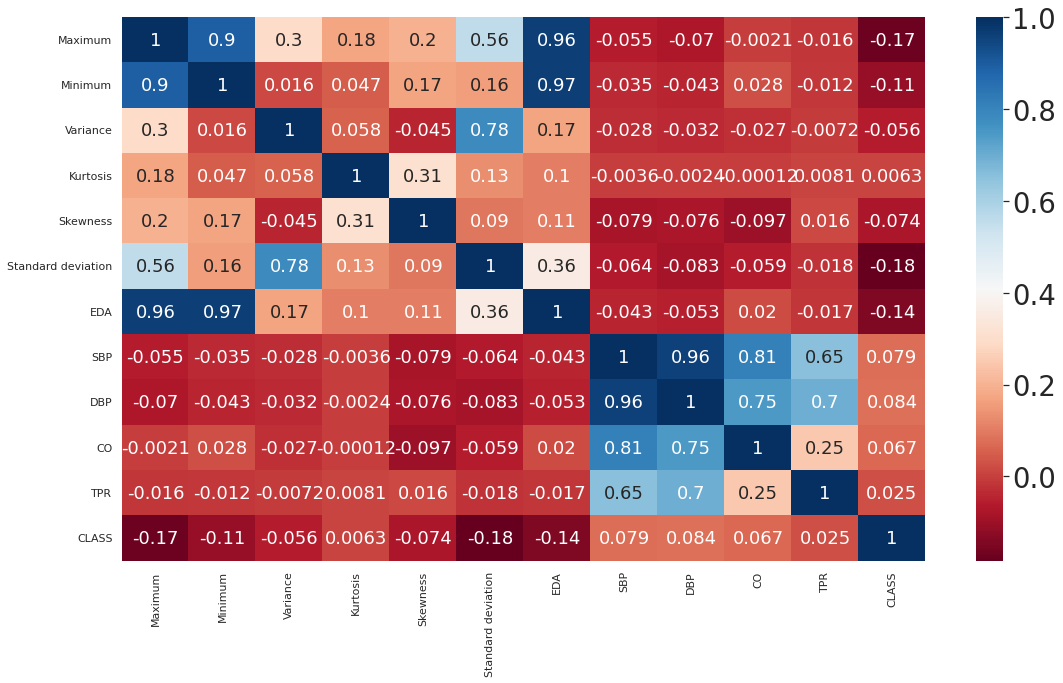

In [ ]:
sn.set_style("darkgrid")
fig_dims = (18,10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.set(font_scale=2.5)
sn.heatmap(dataset.corr(),annot=True, ax=ax, annot_kws={"size": 18}, cmap='RdBu')
plt.show()

Counter({5: 716, 1: 512, 0: 465, 4: 140, 9: 130, 3: 108, 10: 94, 2: 71, 7: 65, 6: 61, 8: 58})


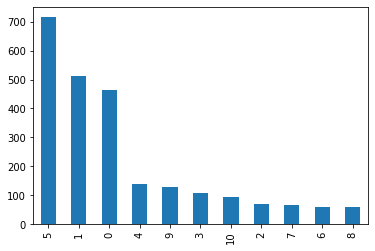

In [ ]:
X = dataset.drop(['CLASS'], axis = 1)
y = dataset['CLASS'] 
counter = Counter(y)
print(counter)
pd.value_counts(dataset['CLASS']).plot.bar()

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X, y)

In [ ]:
#%% Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#%%                               Feature Scaling


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#%%                   Fitting Logistic Regression to the Training set


from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)    
classifier_lg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lg = classifier_lg.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)

# sn.heatmap(cm_lg, annot= True)

w = model_score(y_test,y_pred_lg)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_lg) # for 2nd layer 

print("\n")
print("Summary of logistic Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of logistic Algorithm 

Accuracy    = 0.3225950782997763
Precision   = 0.3144072589146682
Recall      = 0.32092415973649796
F1 Score    = 0.29461730137233033




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#%%                            Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

w = model_score(y_test,y_pred_knn)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
y_predict.append(y_pred_knn) # for 2nd layer 

print("\n")
print("Summary of KNN Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of KNN Algorithm 

Accuracy    = 0.6192393736017897
Precision   = 0.5958540534740818
Recall      = 0.615036864119769
F1 Score    = 0.5914133025695545




In [ ]:
#%%                         Fitting SVM to the Training set


from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

w = model_score(y_test,y_pred_svm)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_svm) # for 2nd layer 

print("\n")
print("Summary of SVM Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of SVM Algorithm 

Accuracy    = 0.3865771812080537
Precision   = 0.37025449020809814
Recall      = 0.384917734094647
F1 Score    = 0.3612448621878057




In [ ]:
#%%                    Training the Naive Bayes model on the Training set


from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

w = model_score(y_test,y_pred_nb)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_nb) # for 2nd layer 

print("\n")
print("Summary of Naive Bayes Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Naive Bayes Algorithm 

Accuracy    = 0.26532438478747206
Precision   = 0.30774067564874225
Recall      = 0.2643455614007093
F1 Score    = 0.2348826953194094




In [ ]:
#%%                  Fitting Decision Tree Classification to the Training set

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # entropy, gini
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

w = model_score(y_test,y_pred_dt)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_dt) # for 2nd layer 

print("\n")
print("Summary of Decision Tree Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Decision Tree Algorithm 

Accuracy    = 0.6031319910514541
Precision   = 0.588935720060718
Recall      = 0.5987178510391823
F1 Score    = 0.5922764314263435




In [ ]:
#%%                Fitting Random Forest Classification to the Training set


from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 1500, criterion = 'gini', random_state = 0) #'entropy' ,'gini'
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
w = model_score(y_test,y_pred_rf)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
y_predict.append(y_pred_rf) # for 2nd layer 

print("\n")
print("Summary of Random Forest Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])

[[105   8  14  10  10   9   0   2  13  23   3]
 [ 15  71  15  15   9   8   6   4  17  10  24]
 [  2   2 166   5   7   0   0   0   7  10   0]
 [  5   6   5 179   8   2   0   0  11   6   0]
 [  5   4   3   6 166   4   1   0   3   3   0]
 [ 13  22  12  19  26  63   7   4   9  15   5]
 [  0   0   0   0   0   1 198   3   0   0   2]
 [  0   0   0   0   0   0   4 194   0   0  10]
 [  1   4   6   1   4   1   1   0 175   4   0]
 [ 11   1   7   4   7   2   0   0   7 178   0]
 [  0   1   0   0   0   0   3   9   0   0 194]]


Summary of Random Forest Algorithm 

Accuracy    = 0.7557046979865771
Precision   = 0.7449226079844306
Recall      = 0.7511718565135799
F1 Score    = 0.735799109397674




In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       197
           1       0.60      0.37      0.45       194
           2       0.73      0.83      0.78       199
           3       0.75      0.81      0.78       222
           4       0.70      0.85      0.77       195
           5       0.70      0.32      0.44       195
           6       0.90      0.97      0.93       204
           7       0.90      0.93      0.92       208
           8       0.72      0.89      0.80       197
           9       0.71      0.82      0.76       217
          10       0.82      0.94      0.87       207

    accuracy                           0.76      2235
   macro avg       0.74      0.75      0.74      2235
weighted avg       0.75      0.76      0.74      2235



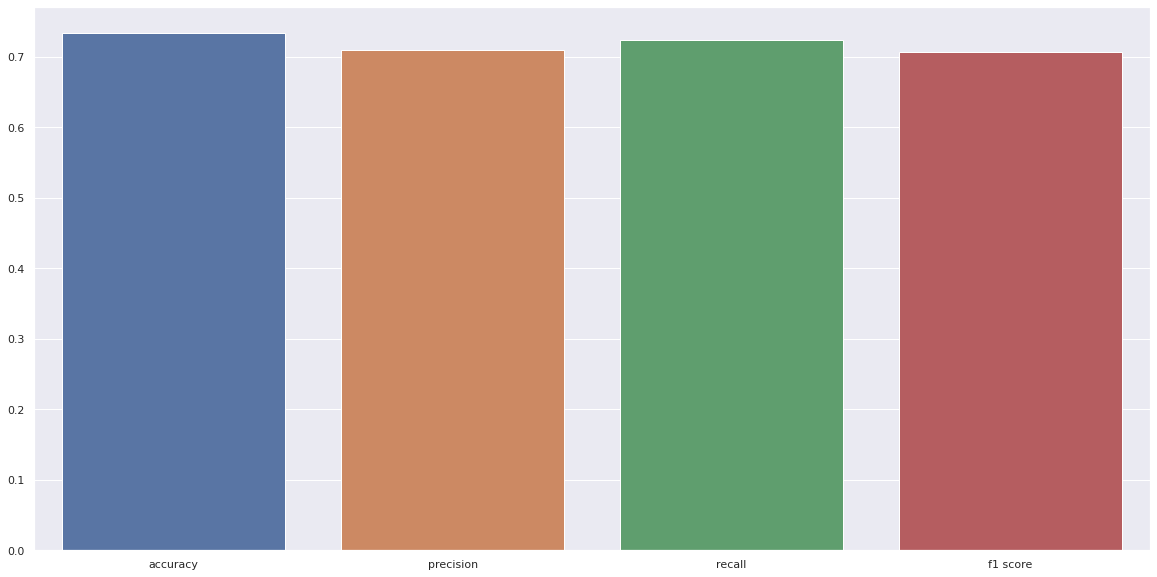

Accuracy   : 0.7345148979891384
Precision  : 0.7098053919100199
Recall     : 0.723540000164504
f1 score   : 0.7071566909136419




[0.7345148979891384, 0.7098053919100199, 0.723540000164504, 0.7071566909136419]

In [ ]:
k_fold(classifier_rf)

In [ ]:
#%%                      Training XGBoost on the Training set


from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7) #n_estimator =15 
classifier_xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

w = model_score(y_test,y_pred_xgb)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
y_predict.append(y_pred_xgb) # for 2nd layer 

print("\n")
print("Summary of XGBooost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of XGBooost Algorithm 

Accuracy    = 0.6621923937360179
Precision   = 0.6410082781527655
Recall      = 0.657991155560494
F1 Score    = 0.643263862755034






Summary of AdaBoost Algorithm 

Accuracy    = 0.19776286353467562
Precision   = 0.19320509781353523
Recall      = 0.19987640876682392
F1 Score    = 0.16440290812248998




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


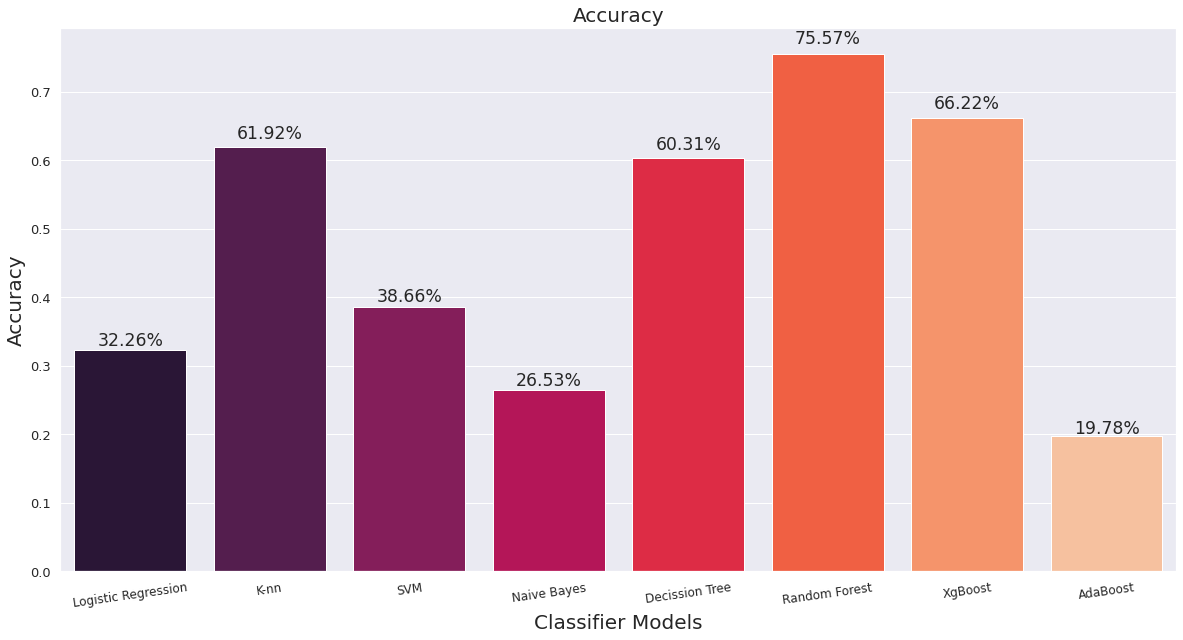

In [ ]:
#%%                              Adaboost Classifier


from sklearn.ensemble import AdaBoostClassifier
classifier_abd = AdaBoostClassifier(n_estimators=200, learning_rate=1)# n_est = 400
classifier_abd.fit(X_train, y_train)
y_pred_abd = classifier_abd.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_abd = confusion_matrix(y_test, y_pred_abd)

w = model_score(y_test,y_pred_abd)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_abd) # for 2nd layer 

print("\n")
print("Summary of AdaBoost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])  
    
    

plott(algorithms,accuracy,"Accuracy") 
    

In [ ]:
#%% Ensemble Learning


a = len(y_predict)
b= len(y_test)

# Test data
y_all = np.array(y_predict)
y_all.transpose()
y_all.dot(y_all.transpose())
y_all.shape = (a,b)
y_all_t= y_all.transpose()



#%%     2nd layer 
# Initialization
y_predict = [] # for multilayer
algorithms = ["Logistic Regression","K-nn", "SVM", "Naive Bayes", "Decission Tree", "Random Forest","XgBoost", "AdaBoost"]
accuracy  = []
precision = []
recall    = []
f1_value  = []
#%%               Spliting the dataset into Training set and Test set
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_all_t, y_test, test_size = 0.30, random_state = 0)
#%%                               Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)

(1564, 3)


In [ ]:
#%%                   Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)
# Predicting the Test set results
y_pred_lg = classifier_lg.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)
# sn.heatmap(cm_lg, annot= True)
w = model_score(y_test,y_pred_lg)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of logistic Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of logistic Algorithm 

Accuracy    = 0.4187779433681073
Precision   = 0.32826957090651504
Recall      = 0.4027353976490652
F1 Score    = 0.3268633105949504




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#%%                            Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
w = model_score(y_test,y_pred_knn)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of KNN Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of KNN Algorithm 

Accuracy    = 0.6721311475409836
Precision   = 0.6768894728913892
Recall      = 0.6670237991904311
F1 Score    = 0.6604078753404519




In [ ]:
#%%                         Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
w = model_score(y_test,y_pred_svm)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of SVM Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of SVM Algorithm 

Accuracy    = 0.684053651266766
Precision   = 0.6655592828804611
Recall      = 0.6769863726177435
F1 Score    = 0.6582929237566696




In [ ]:
#%%                    Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
w = model_score(y_test,y_pred_nb)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of Naive Bayes Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Naive Bayes Algorithm 

Accuracy    = 0.46348733233979134
Precision   = 0.41151384977778593
Recall      = 0.4545492686589004
F1 Score    = 0.4002518726619732




In [ ]:
#%%                  Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) # entropy, gini
classifier_dt.fit(X_train, y_train)
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
w = model_score(y_test,y_pred_dt)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of Decision Tree Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Decision Tree Algorithm 

Accuracy    = 0.7183308494783904
Precision   = 0.6949621124821587
Recall      = 0.7110097649155273
F1 Score    = 0.6997858878515062




In [ ]:
#%%                Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 1500, criterion = 'gini', random_state = 0) #'entropy' ,'gini'
classifier_rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
w = model_score(y_test,y_pred_rf)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of Random Forest Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of Random Forest Algorithm 

Accuracy    = 0.7391952309985097
Precision   = 0.7139129415610008
Recall      = 0.7331247976764931
F1 Score    = 0.7180640628125663




In [ ]:
#%%                      Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(n_estimators = 12, max_depth=12, subsample=0.7)
classifier_xgb.fit(X_train, y_train)
# Predicting the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
w = model_score(y_test,y_pred_xgb)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of XGBooost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of XGBooost Algorithm 

Accuracy    = 0.7764530551415797
Precision   = 0.7665365770273591
Recall      = 0.7712381994262585
F1 Score    = 0.760657199398577






Summary of AdaBoost Algorithm 

Accuracy    = 0.35171385991058124
Precision   = 0.4244782148539865
Recall      = 0.35977628166623377
F1 Score    = 0.2950849702576053




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


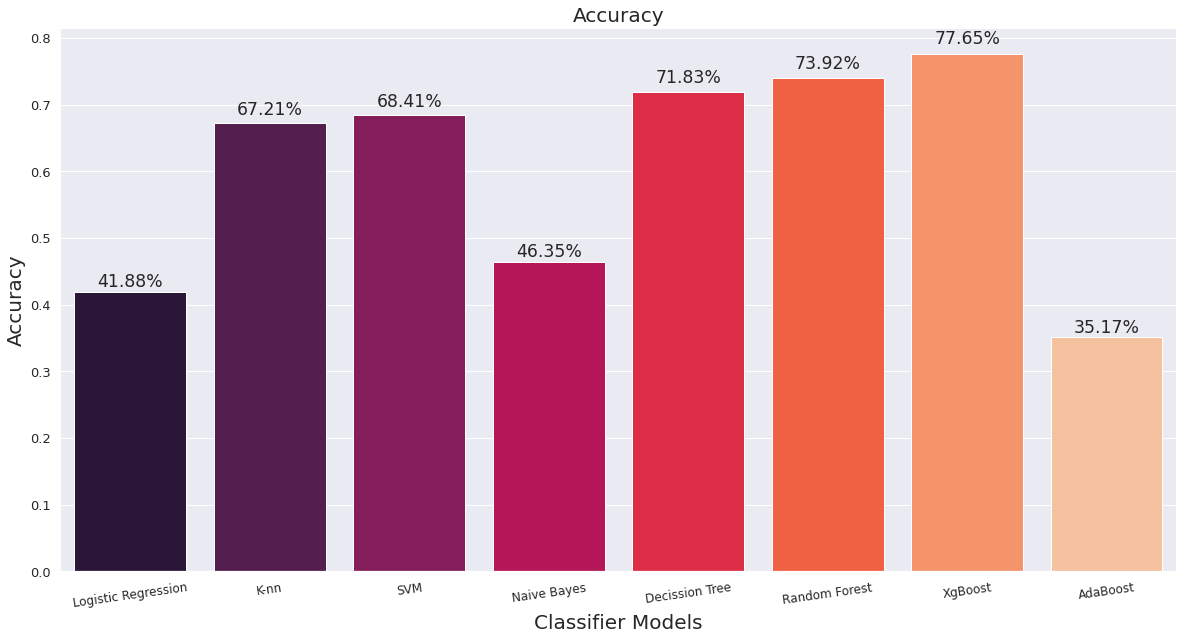

In [ ]:
#%%                              Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier_abd = AdaBoostClassifier(n_estimators=200, learning_rate=1)
classifier_abd.fit(X_train, y_train)
y_pred_abd = classifier_abd.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_abd = confusion_matrix(y_test, y_pred_abd)
w = model_score(y_test,y_pred_abd)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of AdaBoost Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])
#%% _________________________________ Ploting The Results _______________________________________
plott(algorithms,accuracy,"Accuracy")
#plott(algorithms,precision,"Precision")
#plott(algorithms,recall,"Recall")
#plott(algorithms,f1_value,"f1 score")

ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras.backend as K

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(Dense(2000, activation = "relu"))

In [ ]:
#Adding Second Hidden Layer
ann.add(Dense(2000, activation = "relu"))

In [ ]:
#Adding Output Layer
ann.add(Dense(11, activation = "softmax"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
163/163 [==============================] - 6s 34ms/step - loss: 0.3193 - accuracy: 0.9461
Epoch 2/100
163/163 [==============================] - 5s 34ms/step - loss: 0.2551 - accuracy: 0.9425
Epoch 3/100
163/163 [==============================] - 5s 33ms/step - loss: 0.2085 - accuracy: 0.9521
Epoch 4/100
163/163 [==============================] - 5s 33ms/step - loss: 0.2046 - accuracy: 0.9569
Epoch 5/100
163/163 [==============================] - 5s 33ms/step - loss: 0.1891 - accuracy: 0.9521
Epoch 6/100
163/163 [==============================] - 5s 33ms/step - loss: 0.1807 - accuracy: 0.9584
Epoch 7/100
163/163 [==============================] - 5s 33ms/step - loss: 0.1684 - accuracy: 0.9607
Epoch 8/100
163/163 [==============================] - 5s 33ms/step - loss: 0.1638 - accuracy: 0.9588
Epoch 9/100
163/163 [==============================] - 5s 33ms/step - loss: 0.1778 - accuracy: 0.9519
Epoch 10/100
163/163 [==============================] - 5s 33ms/step - loss: 0.180

In [ ]:
# Predicting the Test set results
y_pred = np.argmax(ann.predict(X_test), axis=-1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred)

w = model_score(y_test,y_pred)
accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
print("\n")
print("Summary of ANN Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])



Summary of ANN Algorithm 

Accuracy    = 0.7606263982102909
Precision   = 0.7491801224244906
Recall      = 0.7570062659047845
F1 Score    = 0.7520351155029892




In [ ]:
#%%                           Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn

In [ ]:
#%% Initialization
y_predict = [] # for multilayer
algorithms = ["Logistic Regression","K-nn", "SVM", "Naive Bayes", "Decission Tree", "Random Forest","XgBoost", "AdaBoost"]
accuracy  = []
precision = []
recall    = []
f1_value  = []

In [ ]:
#%%    User define function 
# print function 
def print_summary(ac,pr,re,f):
    print("Accuracy    =", ac)
    print("Precision   =", pr)
    print("Recall      =", re)
    print("F1 Score    =", f)
    print("\n")

In [ ]:
# model score function 
def model_score (y_test,y_pred):
    # Statistical Score
    st = 'macro'  # 'micro',  'macro' , 'weighted' None
    ac  = accuracy_score(y_test, y_pred)  # for multi class
    pre = precision_score(y_test, y_pred, average = st) # use [accuracy_score(y_test, y_pred, average = st)]
    re  = recall_score(y_test, y_pred, average = st)
    f1  = f1_score(y_test, y_pred, average = st) 
    results = [ac,pre,re, f1]
    return results

In [ ]:
#%%                    Training the Naive Bayes model on the Training set


from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

w = model_score(y_test,y_pred_nb)

accuracy.append(w[0]); precision.append(w[1]); recall.append(w[2]); f1_value.append(w[3])
#y_predict.append(y_pred_nb) # for 2nd layer 

print("\n")
print("Summary of Naive Bayes Algorithm \n")     
print_summary(w[0],w[1],w[2],w[3])